In [ ]:
# Task 1: Environment Setup
!pip install gensim
!pip install nltk

import gensim
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Task 2: Load and Preprocess Data

text = """In a distant kingdom, a wise king ruled with a fair hand, always considering the needs of both men and women in his realm.
          His queen stood by his side, offering counsel and strength, ensuring that the voices of all were heard.
          Together, they championed equality, fostering a society where every man and woman could thrive, united under their just leadership."""

sentences = sent_tokenize(text)

stop_words = set(stopwords.words('english'))
tokenized_sentences = []
for sentence in sentences:
    words = word_tokenize(sentence.lower())
    words = [word for word in words if word.isalnum() and word not in stop_words]  # Remove punctuation and stopwords
    tokenized_sentences.append(words)

print("Tokenized Sentences:", tokenized_sentences)


Tokenized Sentences: [['distant', 'kingdom', 'wise', 'king', 'ruled', 'fair', 'hand', 'always', 'considering', 'needs', 'men', 'women', 'realm'], ['queen', 'stood', 'side', 'offering', 'counsel', 'strength', 'ensuring', 'voices', 'heard'], ['together', 'championed', 'equality', 'fostering', 'society', 'every', 'man', 'woman', 'could', 'thrive', 'united', 'leadership']]


In [ ]:
# Task 3: Train the Word2Vec Model

model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1)
print("Vocabulary:", list(model.wv.index_to_key))


Vocabulary: ['leadership', 'considering', 'stood', 'queen', 'realm', 'women', 'men', 'needs', 'always', 'united', 'hand', 'fair', 'ruled', 'king', 'wise', 'kingdom', 'side', 'offering', 'counsel', 'strength', 'ensuring', 'voices', 'heard', 'together', 'championed', 'equality', 'fostering', 'society', 'every', 'man', 'woman', 'could', 'thrive', 'distant']


In [ ]:
# Task 4: Evaluate the Model

similar_words = model.wv.most_similar('king', topn=5)
print("Words similar to 'king':", similar_words)

analogy_result = model.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
print("Result of 'king - man + woman':", analogy_result)


Words similar to 'king': [('realm', 0.25289759039878845), ('equality', 0.1495627760887146), ('together', 0.14717479050159454), ('counsel', 0.14245375990867615), ('considering', 0.1372080296278)]
Result of 'king - man + woman': [('realm', 0.27576759457588196)]


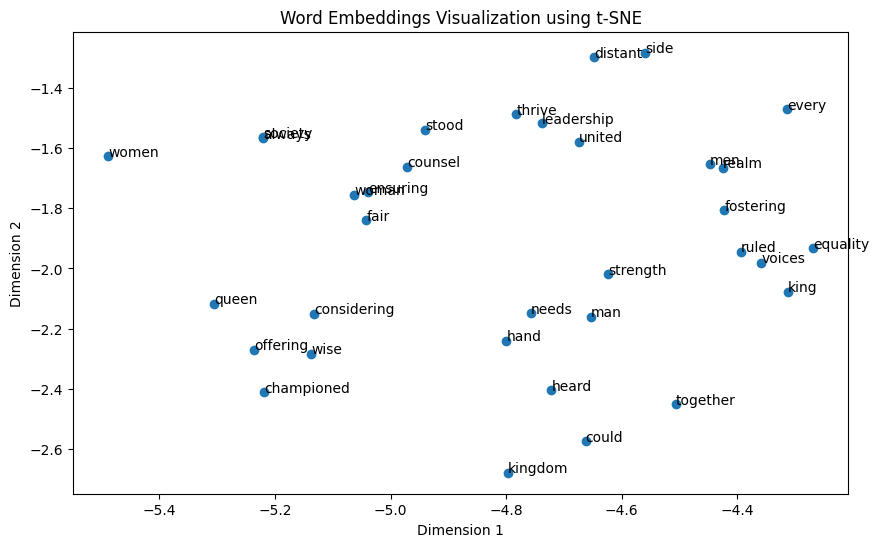

In [ ]:
# Task 5: Visualize Word Embeddings

# Get the word vectors and labels
word_vectors = model.wv[model.wv.index_to_key]
labels = model.wv.index_to_key

# Use TSNE to reduce the dimensions of the word vectors to 2D for visualization
tsne = TSNE(n_components=2, random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Create a scatter plot of the word vectors
plt.figure(figsize=(10, 6))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])

# Annotate points with word labels
for i, label in enumerate(labels):
    plt.annotate(label, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

plt.title("Word Embeddings Visualization using t-SNE")
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()
